# Psychoinformatics - Week 10 (Exercises)
by 李彥廷 (b08207008@ntu.edu.tw)

In [1]:
import numpy as np
from scipy import stats
from sklearn import *
from sklearn import model_selection
from matplotlib.pyplot import *
%matplotlib inline

## 1 檢查 machine learning pipeline (8 points)

### 1.1 請打亂原本的Y觀察正確率是否和chance level (0.33)有差異? 若有, why? (4 points)

In [2]:
# 本題在研究打亂X和打亂Y有差別嗎?
iris = datasets.load_iris()
X=iris.data
Y=iris.target
np.random.shuffle(Y) # 把Y打亂
#print(Y)
clf=neighbors.KNeighborsClassifier(4)
clf.fit(X,Y)
pred=clf.predict(X)
accuracy=np.mean(pred==Y)
print(accuracy)
print(metrics.confusion_matrix(Y,pred))

0.5733333333333334
[[33 10  7]
 [13 29  8]
 [13 13 24]]


打亂Y和打亂X是一樣的，都是讓X跟Y沒有關係，因此我們會期待這個模型的準確度是和chance level (0.33)差不多的。
在打亂Y之後，可以看到正確率還是高於.33，這是因為在training和testing的是同一筆資料，因此正確率會比較高。
若將資料分成兩份，一份拿來train，一份拿來test，會發現正確率屬chance level的範圍。

In [3]:
clf.fit(X[0:75],Y[0:75]) # 用前半部來train
pred=clf.predict(X[75:150]) # 用後半部來test
print(np.mean(pred==Y[75:150]))
print(metrics.confusion_matrix(Y[75:150],pred))

0.26666666666666666
[[16  2  3]
 [23  3  1]
 [24  2  1]]


因此要使用cross-validation的方式來檢查pipeline會比較好。

In [4]:
kf=model_selection.KFold(10,shuffle=True)
sc=model_selection.cross_val_score(clf,X,Y,cv=kf)
print(sc.mean())

0.31333333333333335


### 1.2 請用母數或無母數統計檢定以下accuracies中的結果是否和chance level (0.5)有差異? 若有, why? (4 points)

In [5]:
Y=np.remainder(range(200),2) 
print(Y) #Y的0和1個數一樣多

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [6]:
# 跑一百次測試:
clf = svm.SVC()
accuracies = []
for i in range(100):
    X = np.random.rand(200, 2)  # X取亂數
    # Leave-one-out cross-validation
    kf = model_selection.KFold(len(Y), shuffle=True)
    sc = model_selection.cross_val_score(clf, X, Y, cv=kf)
    accuracies.append(sc.mean())

[0.535, 0.605, 0.535, 0.58, 0.48, 0.47, 0.555, 0.51, 0.51, 0.47, 0.45, 0.38, 0.455, 0.51, 0.5, 0.56, 0.44, 0.515, 0.44, 0.415, 0.53, 0.47, 0.51, 0.465, 0.52, 0.535, 0.545, 0.56, 0.4, 0.565, 0.51, 0.41, 0.625, 0.485, 0.305, 0.45, 0.55, 0.47, 0.505, 0.325, 0.545, 0.46, 0.43, 0.47, 0.585, 0.505, 0.5, 0.57, 0.42, 0.54, 0.495, 0.475, 0.56, 0.545, 0.52, 0.45, 0.48, 0.505, 0.495, 0.49, 0.43, 0.455, 0.425, 0.5, 0.54, 0.465, 0.505, 0.44, 0.4, 0.43, 0.46, 0.43, 0.4, 0.515, 0.41, 0.45, 0.41, 0.425, 0.515, 0.53, 0.46, 0.415, 0.52, 0.505, 0.405, 0.46, 0.515, 0.455, 0.515, 0.455, 0.495, 0.47, 0.48, 0.525, 0.315, 0.555, 0.465, 0.47, 0.41, 0.45]


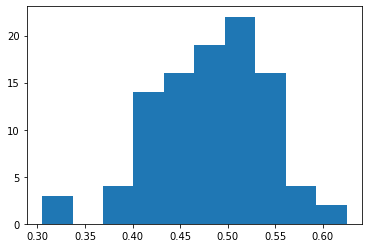

0.18849456310272217


In [7]:
# Please do your statistical tests here:
print(accuracies)
show(matplotlib.pyplot.hist(accuracies))
statistics,pvalue=stats.shapiro(accuracies)
print(pvalue)

利用Shapiro-Wilk test來檢驗accuracies的分布是否為常態，虛無假設為資料是從常態分布抽出。
由於p-value=0.18849456310272217，所以接受虛無假設。

In [23]:
ttest_statistics,ttest_pvalue=stats.ttest_1samp(accuracies,0.50)
print('statistics: ',ttest_statistics)
print('pvalue: ',ttest_pvalue)

statistics:  -3.1138593555745895
pvalue:  0.0024149309618001083


可以看到pvalue約為0.0024，所以拒絕母體平均為0.5的假設。雖然拒絕了期望值為0.5的虛無假設，但若把虛無假設改為0.49的話會接受虛無假設，我認為這個微小的差異應該是來自於機器學習的演算法或是cross-validation的機制造成的，讓這個正確率的分布較為不同，但大致上來說正確率還是在chance level。

### Please submit your HTML notebook before next Monday (12/6).

<h1><font color=red>下週一(12/6)沒有直播! 課程錄影在NTU COOL上面!</font></h1>